### Connect to google colab and set working directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis


### Dataset path

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray'

### Train model

In [ ]:
!python -m src.train --data_dir "$data_dir" --out_dir "/content/drive/MyDrive/pneumonia_runs/mobilenet_v3" --epochs 10 --arch mobilenet_v3 --loss focal --focal-gamma 2.0 --alpha-mode inv_freq --balance sampler --patience 3


Class counts: [1114, 2951]
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-5c1a4163.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-5c1a4163.pth
100% 21.1M/21.1M [00:00<00:00, 92.2MB/s]
Imbalance summary: {'strategy': 'sampler', 'loss': 'focal', 'class_counts': [1114, 2951], 'class_weights': None, 'focal_alpha': [1.4519065618515015, 0.5480934381484985]}
Epoch 1: train loss 0.0803 acc 0.7921 | val loss 0.0581 acc 0.8588 roc_auc 0.9836 pr_auc 0.9939
Epoch 2: train loss 0.0535 acc 0.8775 | val loss 0.0288 acc 0.9401 roc_auc 0.9908 pr_auc 0.9966
Epoch 3: train loss 0.0477 acc 0.8912 | val loss 0.0461 acc 0.8983 roc_auc 0.9911 pr_auc 0.9967
Epoch 4: train loss 0.0372 acc 0.9264 | val loss 0.0381 acc 0.9333 roc_auc 0.9923 pr_auc 0.9970
Epoch 5: train loss 0.0316 acc 0.9345 | val loss 0.0311 acc 0.9412 roc_auc 0.9916 pr_auc 0.9965
Epoch 6: train loss 0.0304 acc 0.9377 | val loss 0.0332 acc 0.9424 roc_auc 0.9910 pr_auc 0.9961
Epoch 7: train loss 0.0304 acc 0.

### Evaluate performance

In [ ]:
!python -m src.eval --data_dir "$data_dir" --checkpoint "/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/best_mobilenet_v3.pt"

Classification report:
              precision    recall  f1-score   support

      NORMAL       0.93      0.97      0.95       237
   PNEUMONIA       0.99      0.97      0.98       669

    accuracy                           0.97       906
   macro avg       0.96      0.97      0.97       906
weighted avg       0.97      0.97      0.97       906

Imbalance-aware Metrics:
  ROC-AUC: 0.9971
  PR-AUC: 0.9990
  Specificity>=0.90: thr=0.174 sens=0.994 spec=0.903 prec=0.967
  Best F1: thr=0.356 sens=0.987 spec=0.962 prec=0.987 f1=0.987
Confusion matrix:
[[230   7]
 [ 17 652]]


### Vizualize pneumonia_1 with Grad-CAM Bacteria

In [ ]:
from IPython.display import Image

In [ ]:
pneumonia_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person14_bacteria_51.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/best_mobilenet_v3.pt" --image_path "$pneumonia_1" --out_path "/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_pneumonia_1.png" --arch "mobilenet_v3"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_pneumonia_1.png. Pred class id: 1


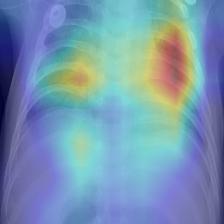

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_pneumonia_1.png')

### Vizualize pneumonia_2 with Grad-CAM Virus

In [ ]:

pneumonia_2 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person15_virus_46.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/best_mobilenet_v3.pt" --image_path "$pneumonia_2" --out_path "/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_pneumonia_2.png" --arch "mobilenet_v3"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_pneumonia_2.png. Pred class id: 1


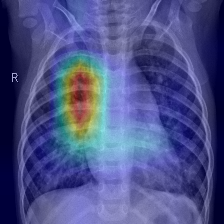

In [ ]:
Image("/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_pneumonia_2.png")

### Vizualize Noraml with Grad-CAM

In [ ]:
noraml_1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/NORMAL/IM-0433-0001.jpeg"
!python -m src.gradcam --checkpoint "/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/best_mobilenet_v3.pt" --image_path "$noraml_1" --out_path "/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_noraml_1.png" --arch "mobilenet_v3"

Saved Grad-CAM to /content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_noraml_1.png. Pred class id: 0


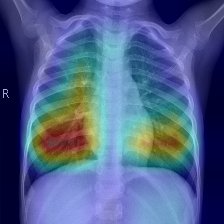

In [ ]:
Image("/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_noraml_1.png")

### Trainable parameter size

In [ ]:
from src.model import create_model
from src.utils import IMAGENET_MEAN, IMAGENET_STD, load_checkpoint

ckpt = load_checkpoint("/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/best_mobilenet_v3.pt")
model = create_model(num_classes=len(ckpt.get("class_to_idx", {0:'Normal',1:'Pneumonia'})), arch="mobilenet_v3", pretrained=False)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params:,}")

Total trainable parameters: 4,924,850
